# Big Data Bandits - Key Visualizations: Project 4
------

### This shall include some summary level datas to support our EDA Process: 
**Holiday Exploration**
> **Three Types**
> - National
> - Regional
> - Local

**Data Prep/ETL Process**
- **Extract** the data (.csv files) via **<library used here>**
- **Transform** visa joins
- **Load** into pandas dataframe

In [47]:
# Import Dependicies
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [61]:
#Pass in csv files and load as dataframe
holidays_events_df = pd.read_csv('Resources\\holidays_events.csv')
holidays_events_df['date'] = pd.to_datetime(holidays_events_df['date'])
holidays_events_df['year'] = holidays_events_df['date'].dt.year
holidays_events_df['date'] = holidays_events_df['date'].dt.strftime('%Y-%m-%d')
holidays_events_df

,date,type,locale,locale_name,description,transferred,year
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False,2012
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,2012
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False,2012
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False,2012
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,2012
...,...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False,2017
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False,2017
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False,2017
348,2017-12-25,Holiday,National,Ecuador,Navidad,False,2017


In [66]:
#Pass in csv files and load as dataframe
grocery_training_data_df = pd.read_csv('Resources\\grocery_train.csv')
grocery_training_data_df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [ ]:
holidays_df = holidays_events_df[holidays_events_df['type'] == 'Holiday']
holidays_df.loc[:, 'date'] = pd.to_datetime(holidays_df['date'])
holidays_df.loc[:, 'year'] = holidays_df['date'].dt.year
holidays_df.loc[:, 'date'] = holidays_df['date'].dt.strftime('%Y-%m-%d')
# holidays_df

In [64]:
holidays_events_summary_df = holidays_events_df.groupby(["year", "type", "locale"])["date"].count()
holidays_events_summary_df = holidays_events_summary_df.unstack(level=-1)
holidays_events_summary_df = holidays_events_summary_df.fillna('')
holidays_events_summary_df

locale          Local  National Regional
year type                               
2012 Additional   1.0       6.0         
     Bridge                 2.0         
     Holiday     22.0       5.0      4.0
     Transfer               1.0         
2013 Additional   2.0       7.0         
     Event                  1.0         
     Holiday     23.0      11.0      4.0
     Transfer               1.0         
     Work Day               2.0         
2014 Additional   2.0       7.0         
     Bridge                 1.0         
     Event                 17.0         
     Holiday     23.0      11.0      4.0
     Transfer               1.0         
     Work Day               1.0         
2015 Additional   1.0       7.0         
     Bridge                 1.0         
     Event                  3.0         
     Holiday     24.0      11.0      4.0
     Work Day               1.0         
2016 Additional   2.0       7.0         
     Bridge                 1.0         
     Event                 34.0         
     Holiday     23.0      11.0      4.0
     Transfer     1.0       2.0         
     Work Day               1.0         
2017 Additional   3.0       6.0         
     Event                  1.0         
     Holiday     22.0      11.0      4.0
     Transfer     3.0       3.0

In [30]:
# Filter data frame for year 2016
yr_2016_holidays_df = holidays_df[holidays_df['year'] == 2016].copy()
yr_2016_holidays_df.head()

,date,type,locale,locale_name,description,transferred,year
211,2016-01-01,Holiday,National,Ecuador,Primer dia del ano,False,2016
212,2016-02-08,Holiday,National,Ecuador,Carnaval,False,2016
213,2016-02-09,Holiday,National,Ecuador,Carnaval,False,2016
214,2016-03-02,Holiday,Local,Manta,Fundacion de Manta,False,2016
215,2016-03-25,Holiday,National,Ecuador,Viernes Santo,False,2016


In [37]:
# Get the count of each holiday type
total_holiday_counts = yr_2016_holidays_df['locale'].value_counts()
total_holiday_counts

Local       23
National    11
Regional     4
Name: locale, dtype: int64

In [55]:
# Get the count # of holidays by locale type
locale_name_holiday_counts = yr_2016_holidays_df['locale_name'].value_counts()
locale_name_holiday_counts.head()

Ecuador      11
Riobamba      2
Guaranda      2
Latacunga     2
Ambato        2
Name: locale_name, dtype: int64

------

## **Visualizing the Data by Holiday Type**
- Use plotly to visualize the data

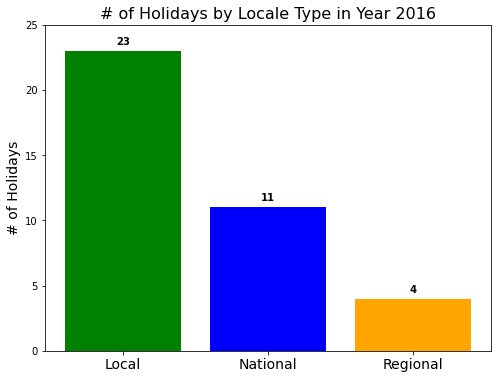

In [58]:
# Create a dictionary of colors for each locale type
colors = {'National': 'blue', 'Regional': 'orange', 'Local': 'green'}

# Create a bar chart
fig, ax = plt.subplots(figsize=(8,6))
for i, locale in enumerate(total_holiday_counts.index):
    ax.bar(i, total_holiday_counts[locale], color=colors[locale])
    ax.text(i, total_holiday_counts[locale]+0.5, str(total_holiday_counts[locale]), ha='center', fontweight='bold')

# Set chart title and labels
ax.set_title('# of Holidays by Locale Type in Year 2016', fontsize=16)
# ax.set_xlabel('Holiday Type', fontsize=14)
ax.set_ylabel('# of Holidays', fontsize=14)

# Set x-axis tick labels and position
ax.set_xticks(range(len(total_holiday_counts.index)))
ax.set_xticklabels(total_holiday_counts.index, fontsize=14)

# Set y-axis range
ax.set_ylim([0, 25])

# Show the chart
plt.show()

------

## **Visualizing the Data by Location**
- Use plotly to visualize the data

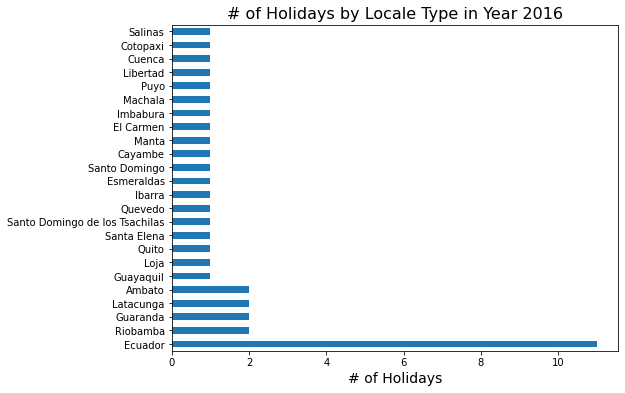

In [60]:
# create a bar chart
fig, ax = plt.subplots(figsize=(8, 6))

# Create a horizontal bar chart using the `plot.barh()` method
locale_name_holiday_counts.plot.barh(ax=ax)
# create bins
bins = [0, 1, 2, np.inf]
bin_labels = ['Bin 1 (0-1)', 'Bin 2 (1-2)', 'Bin 3 (>2)']
locale_name_holiday_counts_binned = pd.cut(locale_name_holiday_counts, bins=bins, labels=bin_labels)

# Set the chart title and axis labels
ax.set_title('# of Holidays by Locale Type in Year 2016', fontsize=16)
ax.set_xlabel("# of Holidays", fontsize=14)
# ax.set_ylabel("Locale name", fontsize=12)

# Display the chart
plt.show()

In [68]:
#Pass in csv files and load as dataframe
oil_df = pd.read_csv('Resources\\oil.csv')
oil_df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [75]:
#Pass in csv files and load as dataframe
stores_df = pd.read_csv('Resources\\stores.csv')
stores_df

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [ ]:
#Pass in csv files and load as dataframe
sample_submission_df = pd.read_csv('Resources\\sample_submission.csv')
sample_submission_df.head()

In [63]:
#Pass in csv files and load as dataframe
transactions_df = pd.read_csv('Resources\\transactions.csv')
transactions_df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [71]:
grocery_training_data_df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [72]:
holidays_events_df

,date,type,locale,locale_name,description,transferred,year
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False,2012
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,2012
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False,2012
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False,2012
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,2012
...,...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False,2017
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False,2017
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False,2017
348,2017-12-25,Holiday,National,Ecuador,Navidad,False,2017


In [73]:
oil_df

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [70]:
#Join files & Load into Pandas DataFrame
merged_df = pd.merge(grocery_training_data_df , holidays_events_df, on='date', how='left').merge(oil_df, on='date', how='left')
merged_df

,id,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred,year,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,2013.0,NaN
1,1,2013-01-01,1,BABY CARE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,2013.0,NaN
2,2,2013-01-01,1,BEAUTY,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,2013.0,NaN
3,3,2013-01-01,1,BEVERAGES,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,2013.0,NaN
4,4,2013-01-01,1,BOOKS,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,2013.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2017.0,47.57
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2017.0,47.57
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2017.0,47.57
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2017.0,47.57


In [80]:
# Check for duplicates
duplicates = grocery_training_data_df.duplicated(subset=['date'], keep=False)

grocery_training_duplicate_rows = grocery_training_data_df[duplicates]
print(grocery_training_data_df[duplicates])

              id        date  store_nbr                      family     sales  \
0              0  2013-01-01          1                  AUTOMOTIVE     0.000   
1              1  2013-01-01          1                   BABY CARE     0.000   
2              2  2013-01-01          1                      BEAUTY     0.000   
3              3  2013-01-01          1                   BEVERAGES     0.000   
4              4  2013-01-01          1                       BOOKS     0.000   
...          ...         ...        ...                         ...       ...   
3000883  3000883  2017-08-15          9                     POULTRY   438.133   
3000884  3000884  2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885  2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887  2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  
0   

In [ ]:
#



In [ ]:
# Use plotly to visualize



In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd, datetime
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from time import time
import os
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import  ARIMA
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
from pandas import DataFrame
import xgboost as xgb
from fbprophet import Prophet
import warnings
warnings.filterwarnings('ignore')
# Importing store data
store = pd.read_csv('./data/store.csv')
store.head()